<a href="https://colab.research.google.com/github/C3Suryansu/Widhya-Winternship/blob/main/Week_4_Flight_Delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and Importing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d usdot/flight-delays

 90% 172M/191M [00:01<00:00, 138MB/s]
100% 191M/191M [00:01<00:00, 158MB/s]


In [4]:
!mkdir flight_data
!unzip flight-delays.zip -d flight_data

Archive:  flight-delays.zip
  inflating: flight_data/airlines.csv  
  inflating: flight_data/airports.csv  
  inflating: flight_data/flights.csv  


In [5]:
%cd flight_data

/content/flight_data


#MicroTask 1

In [6]:
import pandas as pd
data = pd.read_csv('flights.csv', low_memory = False)
data.head()

YEAR  MONTH  DAY  ...  AIRLINE_DELAY LATE_AIRCRAFT_DELAY  WEATHER_DELAY
0  2015      1    1  ...            NaN                 NaN            NaN
1  2015      1    1  ...            NaN                 NaN            NaN
2  2015      1    1  ...            NaN                 NaN            NaN
3  2015      1    1  ...            NaN                 NaN            NaN
4  2015      1    1  ...            NaN                 NaN            NaN

[5 rows x 31 columns]

In [7]:
sample_data = data[:100000]

In [8]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [9]:
not_div, div = sample_data['DIVERTED'].value_counts()

In [10]:
print('Flights diverted = {div} while flights not divereted = {not_div}'.format(div = div, not_div = not_div))

Flights diverted = 224 while flights not divereted = 99776


#MicroTask 2

In [11]:
cols = sample_data.columns

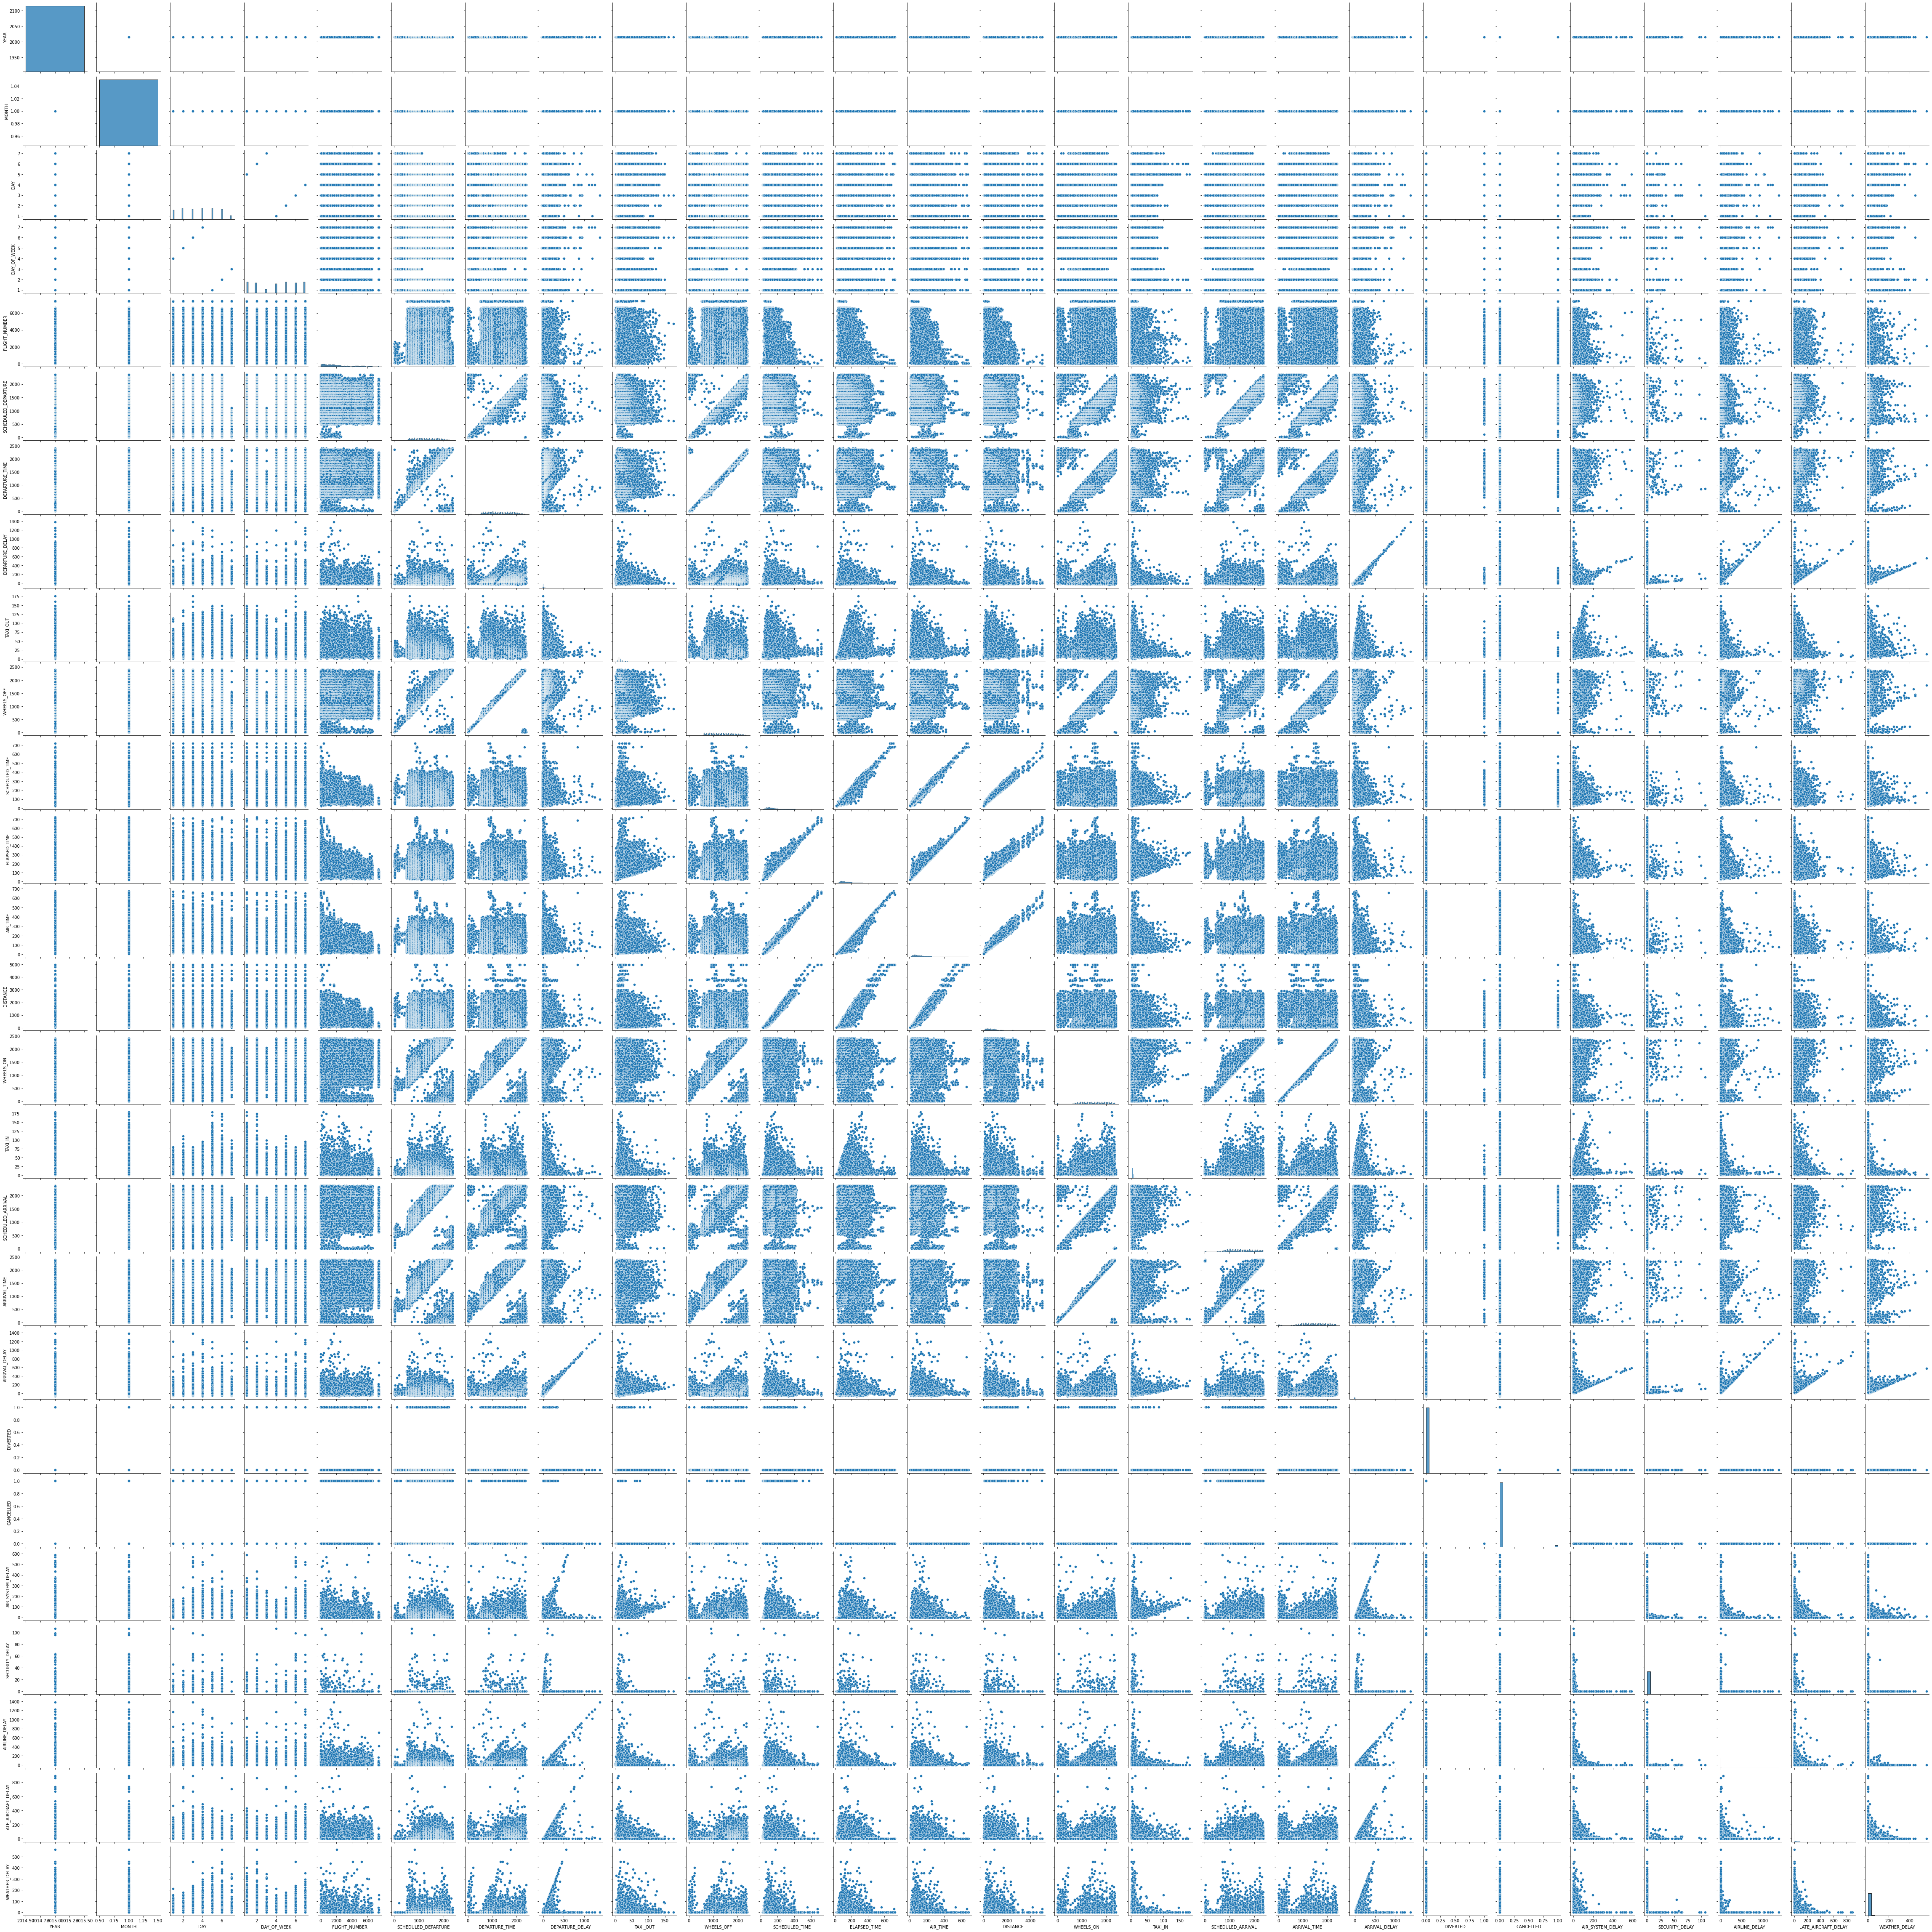

In [12]:
import seaborn as sns
sns.pairplot(sample_data)

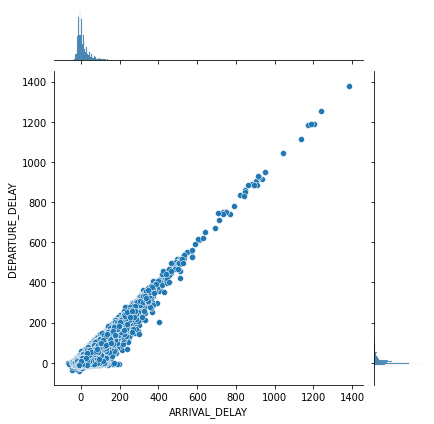

In [13]:
sns.jointplot(data = sample_data, x = "ARRIVAL_DELAY", y = "DEPARTURE_DELAY")

In [14]:
sample_data.corr()

YEAR  MONTH  ...  LATE_AIRCRAFT_DELAY  WEATHER_DELAY
YEAR                  NaN    NaN  ...                  NaN            NaN
MONTH                 NaN    NaN  ...                  NaN            NaN
DAY                   NaN    NaN  ...             0.033213       0.061960
DAY_OF_WEEK           NaN    NaN  ...             0.033729      -0.050835
FLIGHT_NUMBER         NaN    NaN  ...             0.076581       0.004246
SCHEDULED_DEPARTURE   NaN    NaN  ...             0.186286      -0.042004
DEPARTURE_TIME        NaN    NaN  ...             0.247325      -0.046406
DEPARTURE_DELAY       NaN    NaN  ...             0.605289       0.210402
TAXI_OUT              NaN    NaN  ...            -0.129879       0.119412
WHEELS_OFF            NaN    NaN  ...             0.223010      -0.055273
SCHEDULED_TIME        NaN    NaN  ...            -0.084673      -0.001975
ELAPSED_TIME          NaN    NaN  ...            -0.118290       0.014470
AIR_TIME              NaN    NaN  ...            -0.096358      -0.006582
DISTANCE              NaN    NaN  ...            -0.086155      -0.010430
WHEELS_ON             NaN    NaN  ...             0.054199      -0.057202
TAXI_IN               NaN    NaN  ...            -0.004698      -0.018058
SCHEDULED_ARRIVAL     NaN    NaN  ...             0.146386      -0.043930
ARRIVAL_TIME          NaN    NaN  ...             0.050115      -0.058355
ARRIVAL_DELAY         NaN    NaN  ...             0.572956       0.235906
DIVERTED              NaN    NaN  ...                  NaN            NaN
CANCELLED             NaN    NaN  ...                  NaN            NaN
AIR_SYSTEM_DELAY      NaN    NaN  ...            -0.136411       0.019507
SECURITY_DELAY        NaN    NaN  ...            -0.012136       0.000274
AIRLINE_DELAY         NaN    NaN  ...            -0.084750      -0.056336
LATE_AIRCRAFT_DELAY   NaN    NaN  ...             1.000000      -0.021674
WEATHER_DELAY         NaN    NaN  ...            -0.021674       1.000000

[26 rows x 26 columns]

In [15]:
sample_data.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              167
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          2298
DEPARTURE_DELAY         2298
TAXI_OUT                2371
WHEELS_OFF              2371
SCHEDULED_TIME             0
ELAPSED_TIME            2613
AIR_TIME                2613
DISTANCE                   0
WHEELS_ON               2440
TAXI_IN                 2440
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    97611
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

#MicroTask 3

In [16]:
sample_data.drop(columns = ['YEAR', 'FLIGHT_NUMBER', 'AIRLINE', 'DISTANCE', 'TAIL_NUMBER', 'TAXI_OUT', 'SCHEDULED_TIME', 'DEPARTURE_TIME', 'WHEELS_OFF',
                            'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'DAY_OF_WEEK', 'TAXI_IN', 'ARRIVAL_TIME', 'CANCELLATION_REASON'], inplace = True)
sample_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MONTH  DAY ORIGIN_AIRPORT  ... AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY
0      1    1            ANC  ...           NaN                  NaN            NaN
1      1    1            LAX  ...           NaN                  NaN            NaN
2      1    1            SFO  ...           NaN                  NaN            NaN
3      1    1            LAX  ...           NaN                  NaN            NaN
4      1    1            SEA  ...           NaN                  NaN            NaN

[5 rows x 15 columns]

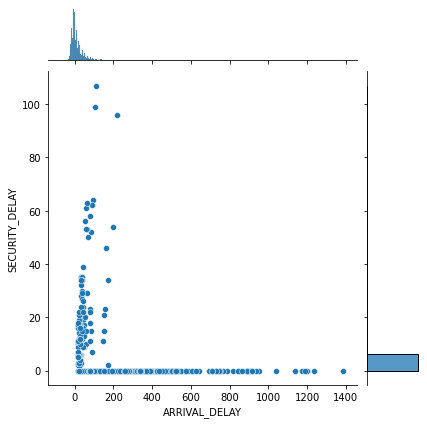

In [17]:
sns.jointplot(data = sample_data, x = "ARRIVAL_DELAY", y = "SECURITY_DELAY")

In [19]:
sample_data.drop(['SECURITY_DELAY'], inplace = True, axis = 1)
sample_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MONTH  DAY ORIGIN_AIRPORT  ... AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY
0      1    1            ANC  ...           NaN                  NaN            NaN
1      1    1            LAX  ...           NaN                  NaN            NaN
2      1    1            SFO  ...           NaN                  NaN            NaN
3      1    1            LAX  ...           NaN                  NaN            NaN
4      1    1            SEA  ...           NaN                  NaN            NaN

[5 rows x 14 columns]

In [23]:
sample_data.fillna(sample_data.mean(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [24]:
sample_data.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [25]:
sample_data.head()

MONTH  DAY ORIGIN_AIRPORT  ... AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY
0      1    1            ANC  ...     17.853921            26.014556       2.751971
1      1    1            LAX  ...     17.853921            26.014556       2.751971
2      1    1            SFO  ...     17.853921            26.014556       2.751971
3      1    1            LAX  ...     17.853921            26.014556       2.751971
4      1    1            SEA  ...     17.853921            26.014556       2.751971

[5 rows x 14 columns]

In [27]:
res = []
for i in sample_data['ARRIVAL_DELAY']:
  if i > 15:
    res.append(1)
  else:
    res.append(0)
sample_data['Result'] = res

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
sample_data['Result'].value_counts()

0    63779
1    36221
Name: Result, dtype: int64

#MicroTask 4

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score

In [32]:
sample_data.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Result'],
      dtype='object')

In [33]:
x = sample_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY', 'Result'], axis = 1)
y = sample_data['Result']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [35]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [38]:
clf = DecisionTreeClassifier()
clf.fit(x_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Microtask 5

In [39]:
pred = clf.predict(x_test_scaled)
confusion_matrix(y_test, pred)

array([[18990,   150],
       [   45, 10815]])

In [40]:
roc_auc_score(pred, y_test)

0.9919780216226355

In [41]:
accuracy_score(pred, y_test)

0.9935

In [42]:
f1_score(pred, y_test)

0.99106529209622

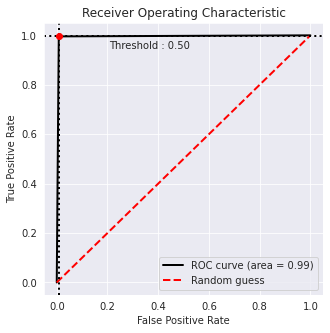

In [47]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_test, pred, labels = ["Delayed", "Not Delayed"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()